# Data Analyst Job Market Analysis

## Objective
- Analyze trends in Data Analyst job postings
- Identify high-paying locations, sectors, and job titles
- Explore skills required from job descriptions
- Predict average salary using machine learning

## Dataset
- 2253 job listings
- Source: Glassdoor (via Kaggle)
- Key columns: Salary, Location, Rating, Job Description, Sector

## 1. Import Required Libraries

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import re

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

## 2. Load Dataset

In [39]:
data = pd.read_csv("DataAnalyst.csv")

print(data.head())
print(data.shape)

   Unnamed: 0                                          Job Title  \
0           0  Data Analyst, Center on Immigration and Justic...   
1           1                               Quality Data Analyst   
2           2  Senior Data Analyst, Insights & Analytics Team...   
3           3                                       Data Analyst   
4           4                             Reporting Data Analyst   

              Salary Estimate  \
0  $37K-$66K (Glassdoor est.)   
1  $37K-$66K (Glassdoor est.)   
2  $37K-$66K (Glassdoor est.)   
3  $37K-$66K (Glassdoor est.)   
4  $37K-$66K (Glassdoor est.)   

                                     Job Description  Rating  \
0  Are you eager to roll up your sleeves and harn...     3.2   
1  Overview\n\nProvides analytical and technical ...     3.8   
2  We’re looking for a Senior Data Analyst who ha...     3.4   
3  Requisition NumberRR-0001939\nRemote:Yes\nWe c...     4.1   
4  ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...     3.9   

       

## 3. Dataset Overview

In [40]:
data.info()
data.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2253 entries, 0 to 2252
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         2253 non-null   int64  
 1   Job Title          2253 non-null   object 
 2   Salary Estimate    2253 non-null   object 
 3   Job Description    2253 non-null   object 
 4   Rating             2253 non-null   float64
 5   Company Name       2252 non-null   object 
 6   Location           2253 non-null   object 
 7   Headquarters       2253 non-null   object 
 8   Size               2253 non-null   object 
 9   Founded            2253 non-null   int64  
 10  Type of ownership  2253 non-null   object 
 11  Industry           2253 non-null   object 
 12  Sector             2253 non-null   object 
 13  Revenue            2253 non-null   object 
 14  Competitors        2253 non-null   object 
 15  Easy Apply         2253 non-null   object 
dtypes: float64(1), int64(2),

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
count,2253.0000,2253,2253,2253,2253.000000,2252,2253,2253,2253,2253.000000,2253,2253,2253,2253,2253,2253
unique,NaN,1272,90,2253,NaN,1513,253,483,9,NaN,15,89,25,14,291,2
top,NaN,Data Analyst,$42K-$76K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,NaN,"Staffigo Technical Services, LLC\n5.0","New York, NY","New York, NY",51 to 200 employees,NaN,Company - Private,-1,Information Technology,Unknown / Non-Applicable,-1,-1
freq,NaN,405,57,1,NaN,58,310,206,421,NaN,1273,353,570,615,1732,2173
mean,1126.0000,NaN,NaN,NaN,3.160630,NaN,NaN,NaN,NaN,1398.522858,NaN,NaN,NaN,NaN,NaN,NaN
std,650.5294,NaN,NaN,NaN,1.665228,NaN,NaN,NaN,NaN,901.929251,NaN,NaN,NaN,NaN,NaN,NaN
min,0.0000,NaN,NaN,NaN,-1.000000,NaN,NaN,NaN,NaN,-1.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,563.0000,NaN,NaN,NaN,3.100000,NaN,NaN,NaN,NaN,-1.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,1126.0000,NaN,NaN,NaN,3.600000,NaN,NaN,NaN,NaN,1979.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,1689.0000,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,2002.000000,NaN,NaN,NaN,NaN,NaN,NaN


## 4. Remove Unnecessary Columns

In [41]:
data.drop(['Unnamed: 0', 'Founded', 'Competitors'], axis=1, inplace=True)

## 5. Rename Columns

In [42]:
data.rename(columns={
    "Job Title": "job_title",
    "Salary Estimate": "salary_estimate",
    "Job Description": "job_description",
    "Company Name": "company_name",
    "Location": "location",
    "Headquarters": "headquarters",
    "Size": "size",
    "Type of ownership": "type_of_ownership",
    "Industry": "industry",
    "Sector": "sector",
    "Revenue": "revenue",
    "Easy Apply": "easy_apply"
}, inplace=True)

data.head()

,job_title,salary_estimate,job_description,Rating,company_name,location,headquarters,size,type_of_ownership,industry,sector,revenue,easy_apply
0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),True
1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1
2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,-1
3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1
4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),True


## 6. Missing Values Check

In [43]:
data.isnull().sum()

job_title            0
salary_estimate      0
job_description      0
Rating               0
company_name         1
location             0
headquarters         0
size                 0
type_of_ownership    0
industry             0
sector               0
revenue              0
easy_apply           0
dtype: int64

## 7. Job Title Cleaning

In [44]:
data['job_title'] = data['job_title'].replace(
    ['Sr. Data Analyst', 'sr data analyst', 'Senior Data Analyst'],
    'Senior Data Analyst', regex=True)

data['job_title'] = data['job_title'].replace(
    ['Junior Data Analyst', 'Data Analyst I'],
    'Junior Data Analyst', regex=True)

data['job_title'].value_counts().head(10)

job_title
Data Analyst               405
Senior Data Analyst        111
Junior Data Analyst         41
Business Data Analyst       28
Junior Data AnalystI        17
Data Quality Analyst        17
Data Analyst Junior         17
Data Governance Analyst     16
Lead Data Analyst           15
Data Reporting Analyst      13
Name: count, dtype: int64

## 8. Top Job Titles Visualization

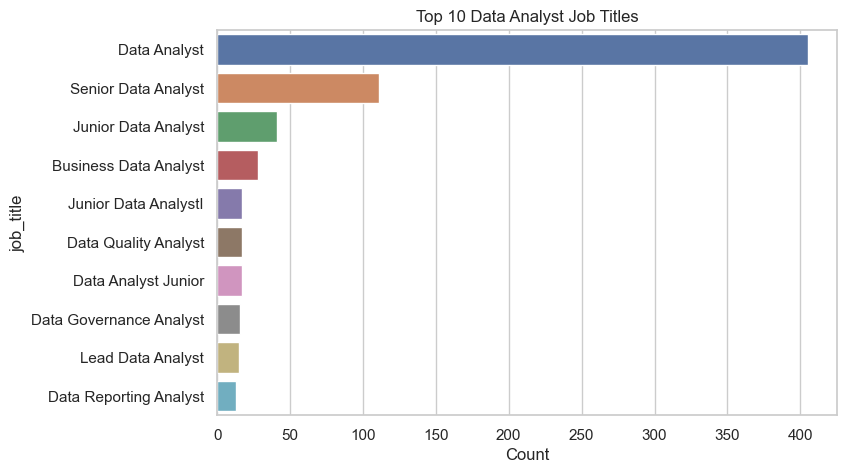

In [45]:
top_jobs = data['job_title'].value_counts().head(10)

plt.figure(figsize=(8,5))
sns.barplot(x=top_jobs.values, y=top_jobs.index)
plt.title("Top 10 Data Analyst Job Titles")
plt.xlabel("Count")
plt.show()

## 9. Salary Extraction & Cleaning

In [46]:
# Extract salary numbers safely
salary_extract = data['salary_estimate'].str.extract(r'\$(\d+)K-\$(\d+)K')

data['MinSalary'] = pd.to_numeric(salary_extract[0], errors='coerce')
data['MaxSalary'] = pd.to_numeric(salary_extract[1], errors='coerce')

# Calculate average salary
data['average_salary'] = (data['MinSalary'] + data['MaxSalary']) / 2

# DROP rows where salary could not be extracted
data = data.dropna(subset=['average_salary'])

# Drop unused columns
data.drop(['salary_estimate', 'MinSalary', 'MaxSalary'], axis=1, inplace=True)


In [47]:
# Verify no missing target values
print("Missing salaries:", data['average_salary'].isnull().sum())

Missing salaries: 0


## 10. Salary Distribution

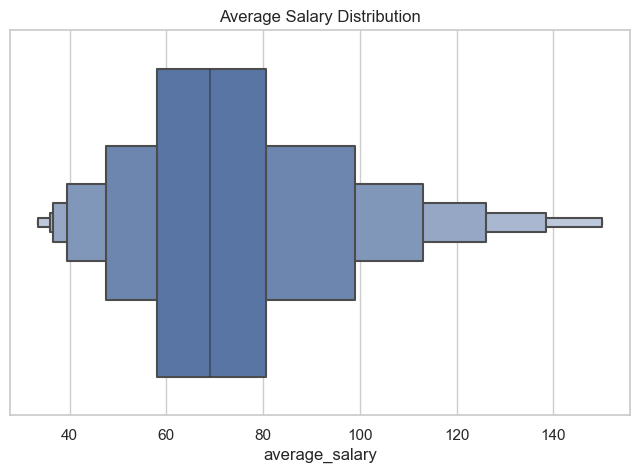

In [48]:
plt.figure(figsize=(8,5))
sns.boxenplot(x=data['average_salary'])
plt.title("Average Salary Distribution")
plt.show()

## 11. Salary by Job Title

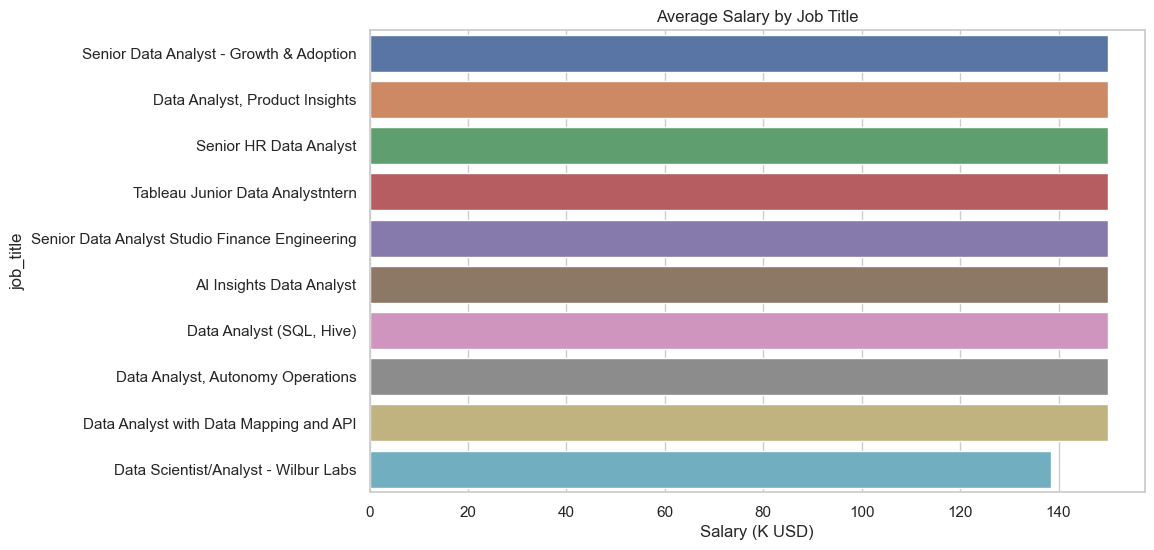

In [49]:
salary_by_job = data.groupby('job_title')['average_salary'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=salary_by_job.values, y=salary_by_job.index)
plt.title("Average Salary by Job Title")
plt.xlabel("Salary (K USD)")
plt.show()

## 12. Salary by Location

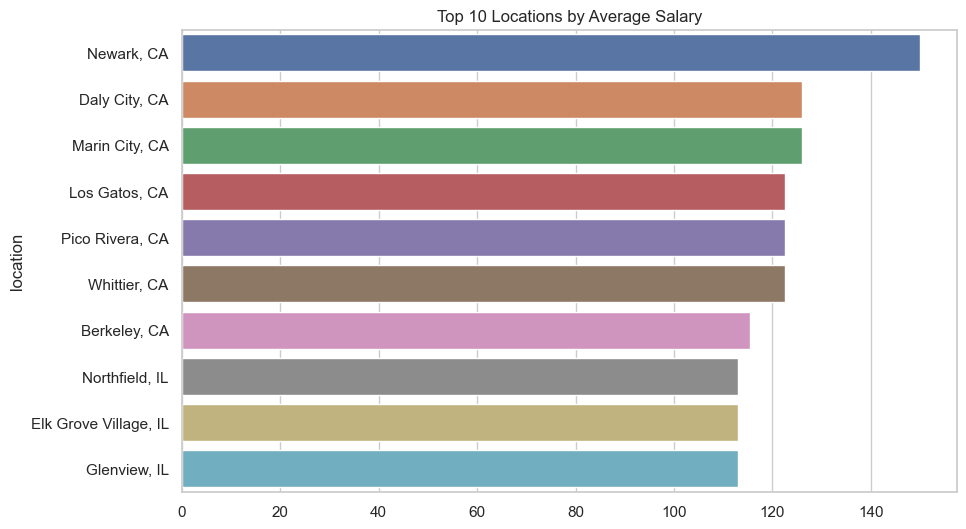

In [50]:
top_locations = data.groupby('location')['average_salary'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_locations.values, y=top_locations.index)
plt.title("Top 10 Locations by Average Salary")
plt.show()

## 13. Company Size Analysis

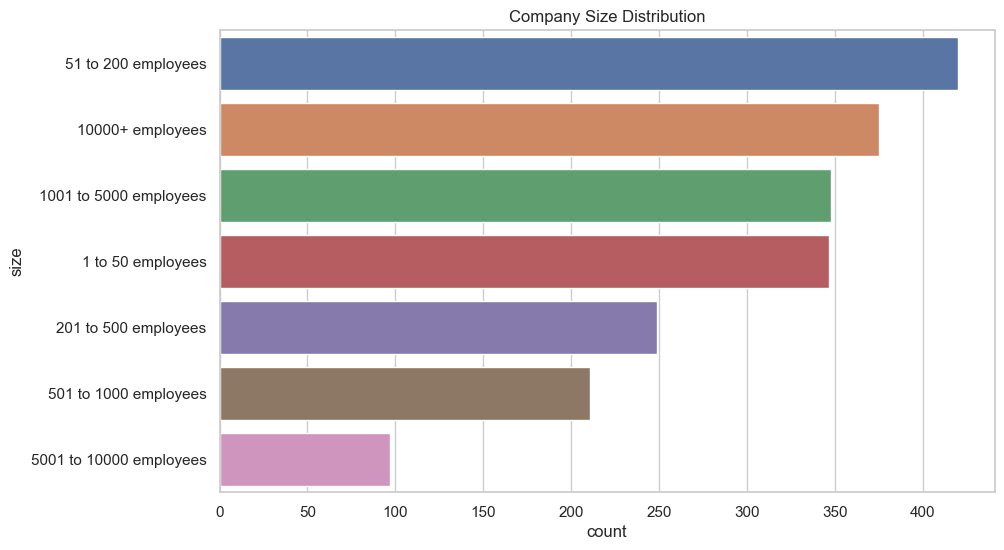

In [51]:
filtered = data[(data['size'] != '-1') & (data['size'] != 'Unknown')]

plt.figure(figsize=(10,6))
sns.countplot(y=filtered['size'], order=filtered['size'].value_counts().index)
plt.title("Company Size Distribution")
plt.show()

## 14. Sector Distribution

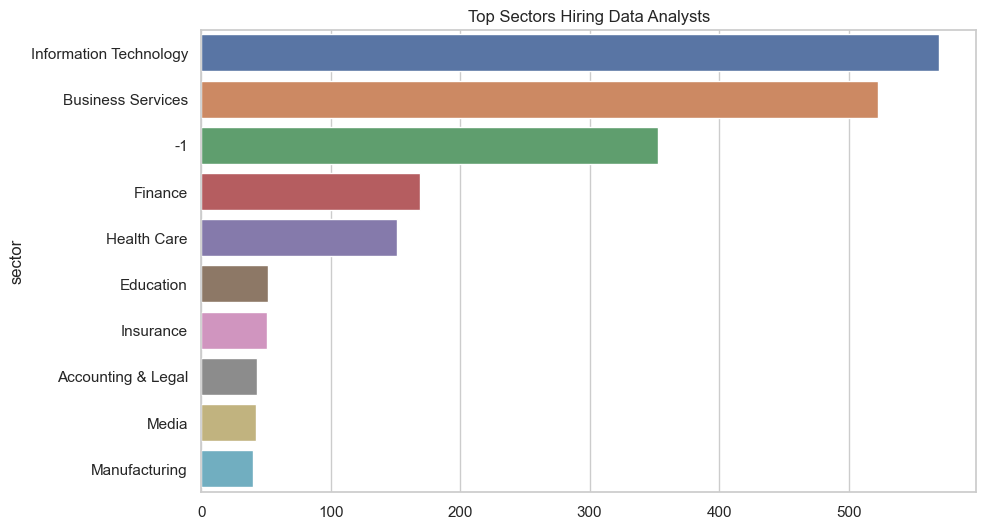

In [52]:
sector_count = data['sector'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=sector_count.values, y=sector_count.index)
plt.title("Top Sectors Hiring Data Analysts")
plt.show()

## 15. Salary by Sector

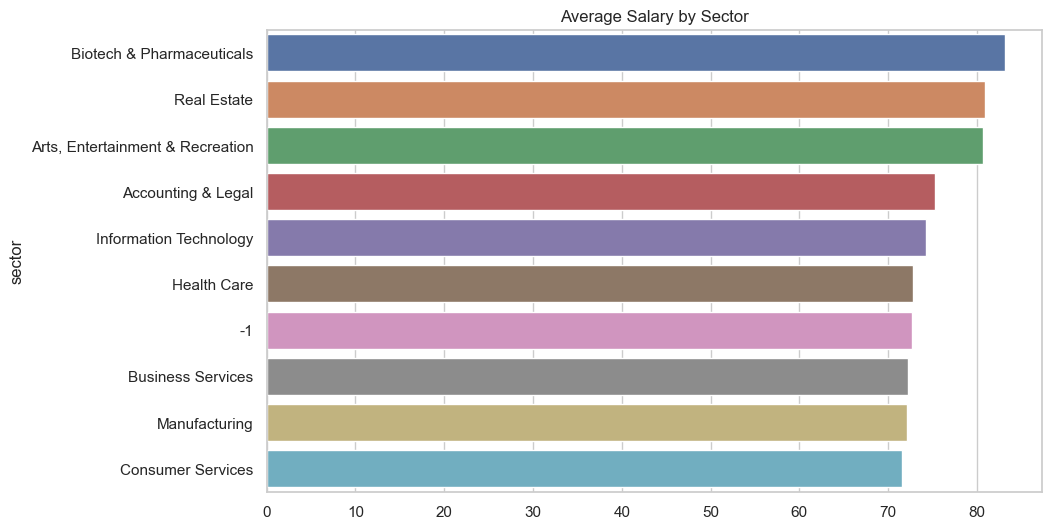

In [53]:
sector_salary = data.groupby('sector')['average_salary'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=sector_salary.values, y=sector_salary.index)
plt.title("Average Salary by Sector")
plt.show()

## 16. Skill Extraction from Job Description

In [54]:
data['Python'] = data['job_description'].str.contains('python', case=False).astype(int)
data['Excel'] = data['job_description'].str.contains('excel', case=False).astype(int)

data[['Python', 'Excel']].sum()

Python     637
Excel     1353
dtype: int64

## 17. Correlation Heatmap

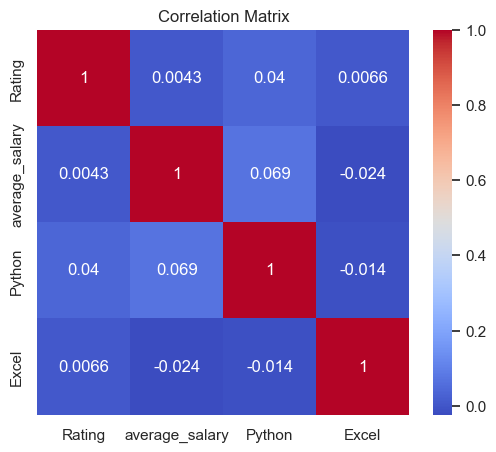

In [55]:
plt.figure(figsize=(6,5))
sns.heatmap(data[['Rating','average_salary','Python','Excel']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

## 18. Machine Learning Model

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

features = ['Rating', 'Python', 'Excel']
X = data[features]
y = data['average_salary']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


MAE: 18.85930113615021
R2 Score: -0.06247866897493548
